<a href="https://colab.research.google.com/github/jyby/PsychoInformatic/blob/master/whatIsMore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scinot

In [ ]:

## Carga de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import binom_test
import numpy as np
import scinot as sn
import os

# Lorenzo 19 de Mayo


In [ ]:
#Carga de datos

lorenzo_1905_file = "/content/2022-05-19_17_3647.207-InCA-BCT-Lorenzo_trained_by_Jeremy-MASKED.csv"
df_1905 = pd.read_csv(lorenzo_1905_file)
df_1905

,Test no,Test Name,Learner,Trainer,C_0,C_1,C_2,C_3,C_4,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,dice,Lorenzo,Jeremy,1,4,NaN,NaN,NaN,4,True,[2022-05-19 17:02(25.981)],7946,background black
1,2,dice,Lorenzo,Jeremy,1,5,NaN,NaN,NaN,5,True,[2022-05-19 17:02(30.82)],3095,background black
2,3,dice,Lorenzo,Jeremy,3,4,NaN,NaN,NaN,4,True,[2022-05-19 17:02(39.70)],7981,background black
3,4,dice,Lorenzo,Jeremy,1,4,NaN,NaN,NaN,4,True,[2022-05-19 17:02(46.295)],6217,background black
4,5,dice,Lorenzo,Jeremy,2,5,NaN,NaN,NaN,5,True,[2022-05-19 17:02(51.633)],4331,background black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,heap,Lorenzo,Jeremy,3,4,2.0,NaN,NaN,4,True,[2022-05-19 17:34(53.468)],3950,background black
176,177,heap,Lorenzo,Jeremy,3,2,5.0,NaN,NaN,5,True,[2022-05-19 17:34(56.511)],2032,background black
177,178,heap,Lorenzo,Jeremy,5,2,4.0,NaN,NaN,4,False,[2022-05-19 17:35(02.323)],4802,background black
178,179,heap,Lorenzo,Jeremy,5,2,4.0,NaN,NaN,4,False,[2022-05-19 17:35(04.70)],737,background black


In [ ]:
#Fix column names
df_1905.columns = ['Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1', 'C_2','C_3','C_4','Value selected','Correction','Date','Answering Time (ms)','Other Parameters']
df_1905.head()

,Test No,Test Name,Learner,Trainer,C_0,C_1,C_2,C_3,C_4,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,dice,Lorenzo,Jeremy,1,4,NaN,NaN,NaN,4,True,[2022-05-19 17:02(25.981)],7946,background black
1,2,dice,Lorenzo,Jeremy,1,5,NaN,NaN,NaN,5,True,[2022-05-19 17:02(30.82)],3095,background black
2,3,dice,Lorenzo,Jeremy,3,4,NaN,NaN,NaN,4,True,[2022-05-19 17:02(39.70)],7981,background black
3,4,dice,Lorenzo,Jeremy,1,4,NaN,NaN,NaN,4,True,[2022-05-19 17:02(46.295)],6217,background black
4,5,dice,Lorenzo,Jeremy,2,5,NaN,NaN,NaN,5,True,[2022-05-19 17:02(51.633)],4331,background black


In [ ]:
#Eliminamos test de 3 variables del Dataframe
df_1905.drop(df_1905.index[80:180], axis=0, inplace=True)
df_1905

,Test No,Test Name,Learner,Trainer,C_0,C_1,C_2,C_3,C_4,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,dice,Lorenzo,Jeremy,1,4,NaN,NaN,NaN,4,True,[2022-05-19 17:02(25.981)],7946,background black
1,2,dice,Lorenzo,Jeremy,1,5,NaN,NaN,NaN,5,True,[2022-05-19 17:02(30.82)],3095,background black
2,3,dice,Lorenzo,Jeremy,3,4,NaN,NaN,NaN,4,True,[2022-05-19 17:02(39.70)],7981,background black
3,4,dice,Lorenzo,Jeremy,1,4,NaN,NaN,NaN,4,True,[2022-05-19 17:02(46.295)],6217,background black
4,5,dice,Lorenzo,Jeremy,2,5,NaN,NaN,NaN,5,True,[2022-05-19 17:02(51.633)],4331,background black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,disc,Lorenzo,Jeremy,3,4,NaN,NaN,NaN,4,True,[2022-05-19 17:26(08.626)],504,background black
76,77,disc,Lorenzo,Jeremy,3,4,NaN,NaN,NaN,4,True,[2022-05-19 17:26(17.340)],7707,background black
77,78,disc,Lorenzo,Jeremy,5,1,NaN,NaN,NaN,5,True,[2022-05-19 17:26(22.681)],4331,background black
78,79,disc,Lorenzo,Jeremy,4,1,NaN,NaN,NaN,4,True,[2022-05-19 17:26(26.854)],3163,background black


In [ ]:
##Eliminamos algunas columnas
df_1905.drop(['C_2','C_3','C_4','Trainer','Date','Answering Time (ms)','Other Parameters'],axis=1,inplace=True)

In [ ]:
#Visualizacion del dataframe
df_1905.head()

,Test No,Test Name,Learner,C_0,C_1,Value selected,Correction
0,1,dice,Lorenzo,1,4,4,True
1,2,dice,Lorenzo,1,5,5,True
2,3,dice,Lorenzo,3,4,4,True
3,4,dice,Lorenzo,1,4,4,True
4,5,dice,Lorenzo,2,5,5,True


In [ ]:
#Descripcion de datos
df_1905.describe()

,Test No,C_0,C_1,Value selected
count,80.0000,80.000000,80.000000,80.000000
mean,40.5000,3.062500,3.087500,3.587500
std,23.2379,1.443832,1.388868,1.229323
min,1.0000,1.000000,1.000000,1.000000
25%,20.7500,2.000000,2.000000,3.000000
50%,40.5000,3.000000,3.000000,4.000000
75%,60.2500,4.000000,4.000000,5.000000
max,80.0000,5.000000,5.000000,5.000000


In [ ]:
#Tamaño DF
df_1905.shape

(80, 7)

### Binominal Test

In [ ]:
df_1905['Correction'].value_counts()


True     58
False    22
Name: Correction, dtype: int64

We have 58 True values and 22 False Values

In [ ]:
k_1905 = 58
n_1905 = 80
p = 0.5
res = binom_test(k_1905, n_1905, p,alternative='greater')
if (res < 0.05):
  print('Lorenzo was ', k_1905/n_1905 *100 , '% Correct ( p=',res  , '< 0.05)')
else:
  print('Lorenzo might choosen by chance ( p=',res, '>0.05)' )

Lorenzo was  72.5 % Correct ( p= 3.505286989959981e-05 < 0.05)


### Chi Squared Test For Side-Bias

In [ ]:
side_selected_1905 = df_1905["C_0"] == df_1905["Value selected"]
side_selected_1905 = side_selected_1905.map({True: 'Left', False: 'Right'})
df_1905.insert (6, "Side Selected", side_selected_1905)
df_1905.head()

,Test No,Test Name,Learner,C_0,C_1,Value selected,Side Selected,Correction
0,1,dice,Lorenzo,1,4,4,Right,True
1,2,dice,Lorenzo,1,5,5,Right,True
2,3,dice,Lorenzo,3,4,4,Right,True
3,4,dice,Lorenzo,1,4,4,Right,True
4,5,dice,Lorenzo,2,5,5,Right,True


In [ ]:
## Porcentajes por Correccion
contigency_1905= pd.crosstab(df_1905['Correction'], df_1905['Side Selected'], normalize='index')
contigency_1905

Side Selected,Left,Right
Correction,,
False,0.090909,0.909091
True,0.275862,0.724138


In [ ]:
## Porcentajes por lado (Side)
contigency_1905= pd.crosstab(df_1905['Correction'], df_1905['Side Selected'], normalize='columns')
contigency_1905

Side Selected,Left,Right
Correction,,
False,0.111111,0.322581
True,0.888889,0.677419


In [ ]:
contigency_1905= pd.crosstab(df_1905['Correction'], df_1905['Side Selected'])
contigency_1905

Side Selected,Left,Right
Correction,,
False,2,20
True,16,42


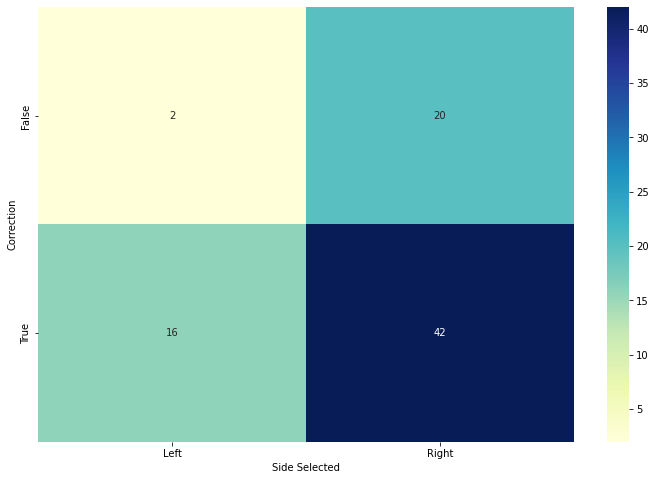

In [ ]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(contigency_1905, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency_1905) # Print the p-value

print("Valor p ",p)
if (p < 0.05):
  print("Se rechaza la Hipotesis Nula")

Valor p  0.1418127576876931


### Correlation Tests - Ain Et All

In [ ]:
from itertools import combinations
comb = combinations(range(1,10), 2)
comb_list = list(comb)
print(comb_list)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [ ]:
true_values = df_1905['Correction'].value_counts()
true_values

True     58
False    22
Name: Correction, dtype: int64

In [ ]:
data_list = []
for item in comb_list:
  c0= item[0]
  c1 = item[1]
  temp_df = df_1905[((df_1905["C_0"] == c0) &  (df_1905["C_1"] == c1)) | ((df_1905["C_0"] == c1) &  (df_1905["C_1"] == c0))  ]
  if temp_df.shape[0] != 0:
    true_values = temp_df['Correction'].sum()
    total = temp_df.shape[0]
    percentaje = true_values/total * 100
    dot_sum = c0+c1
    dot_dif = abs(c0-c1)
    ratio= min(c0,c1)/max(c0,c1)
    print('Valor 1:',c0,'Valor 2:',c1,'Total de Experimentos',total)
    data_list.append([c0,c1,dot_sum,dot_dif,ratio,percentaje])

new_df_1905 = pd.DataFrame(columns=['Valor 1', 'Valor 2','Total','Diferencia','Ratio','Accuracy'], data=data_list)
new_df_1905

Valor 1: 1 Valor 2: 2 Total de Experimentos 4
Valor 1: 1 Valor 2: 3 Total de Experimentos 6
Valor 1: 1 Valor 2: 4 Total de Experimentos 11
Valor 1: 1 Valor 2: 5 Total de Experimentos 11
Valor 1: 2 Valor 2: 3 Total de Experimentos 6
Valor 1: 2 Valor 2: 4 Total de Experimentos 11
Valor 1: 2 Valor 2: 5 Total de Experimentos 6
Valor 1: 3 Valor 2: 4 Total de Experimentos 12
Valor 1: 3 Valor 2: 5 Total de Experimentos 4
Valor 1: 4 Valor 2: 5 Total de Experimentos 9


,Valor 1,Valor 2,Total,Diferencia,Ratio,Porcentaje
0,1,2,3,1,0.500000,100.000000
1,1,3,4,2,0.333333,83.333333
2,1,4,5,3,0.250000,72.727273
3,1,5,6,4,0.200000,81.818182
4,2,3,5,1,0.666667,66.666667
5,2,4,6,2,0.500000,54.545455
6,2,5,7,3,0.400000,100.000000
7,3,4,7,1,0.750000,83.333333
8,3,5,8,2,0.600000,25.000000
9,4,5,9,1,0.800000,55.555556


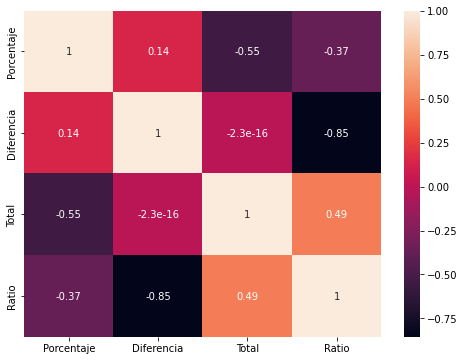

In [ ]:
corr_values__1905= new_df_1905[['Accuracy', 'Diferencia','Total','Ratio']]
corr_df_1905 = corr_values__1905.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df_1905, annot=True)
plt.show()

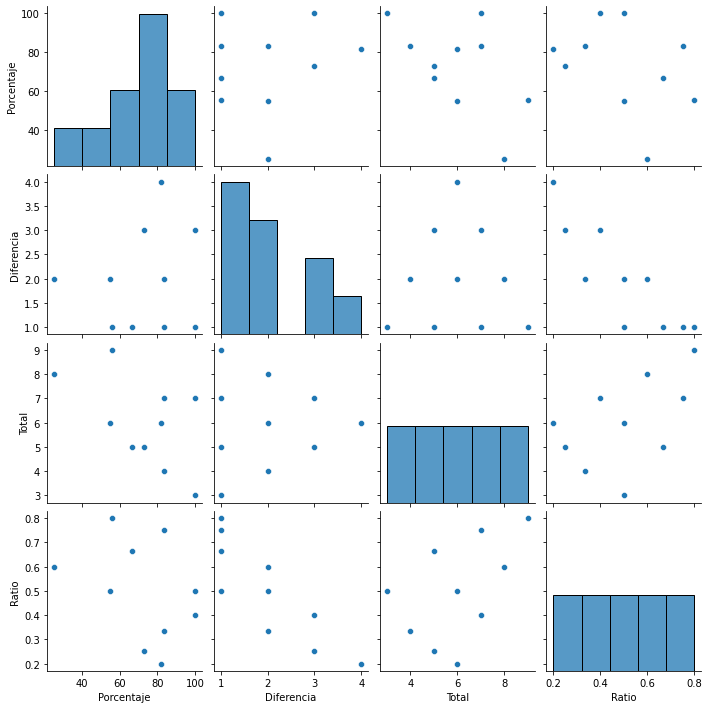

In [ ]:
sns.pairplot(corr_values__1905[['Accuracy', 'Diferencia','Total','Ratio']])
plt.show()

# Lorenzo 23 Mayo

In [ ]:
#Carga de datos

lorenzo_2305_file = "/content/2022-05-23_16_2250.664-InCA-BCT-Lorenzo_trained_by_JeremyMASKED.csv"
df_2305 = pd.read_csv(lorenzo_2305_file)
df_2305.head()

,Test no,Test Name,Learner,Trainer,C_0,C_1,C_2,C_3,C_4,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1.0,disc,Lorenzo,Jeremy,1.0,5.0,NaN,NaN,NaN,5.0,True,[2022-05-23 15:54(34.403)],26843.0,background black - foreground green
1,2.0,disc,Lorenzo,Jeremy,3.0,2.0,NaN,NaN,NaN,3.0,True,[2022-05-23 15:54(42.839)],7429.0,background black - foreground green
2,3.0,disc,Lorenzo,Jeremy,5.0,1.0,NaN,NaN,NaN,5.0,True,[2022-05-23 15:55(02.76)],18231.0,background black - foreground green
3,4.0,disc,Lorenzo,Jeremy,2.0,3.0,NaN,NaN,NaN,3.0,True,[2022-05-23 15:55(10.384)],7299.0,background black - foreground green
4,5.0,disc,Lorenzo,Jeremy,5.0,3.0,NaN,NaN,NaN,3.0,False,[2022-05-23 15:55(11.906)],516.0,background black - foreground green


In [ ]:
#Fix column names
df_2305.columns = ['Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1', 'C_2','C_3','C_4','Value selected','Correction','Date','Answering Time (ms)','Other Parameters']
df_2305.head()

,Test No,Test Name,Learner,Trainer,C_0,C_1,C_2,C_3,C_4,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1.0,disc,Lorenzo,Jeremy,1.0,5.0,NaN,NaN,NaN,5.0,True,[2022-05-23 15:54(34.403)],26843.0,background black - foreground green
1,2.0,disc,Lorenzo,Jeremy,3.0,2.0,NaN,NaN,NaN,3.0,True,[2022-05-23 15:54(42.839)],7429.0,background black - foreground green
2,3.0,disc,Lorenzo,Jeremy,5.0,1.0,NaN,NaN,NaN,5.0,True,[2022-05-23 15:55(02.76)],18231.0,background black - foreground green
3,4.0,disc,Lorenzo,Jeremy,2.0,3.0,NaN,NaN,NaN,3.0,True,[2022-05-23 15:55(10.384)],7299.0,background black - foreground green
4,5.0,disc,Lorenzo,Jeremy,5.0,3.0,NaN,NaN,NaN,3.0,False,[2022-05-23 15:55(11.906)],516.0,background black - foreground green


In [ ]:
##Eliminamos algunas columnas
df_2305.drop(['C_2','C_3','C_4','Trainer','Date','Answering Time (ms)','Other Parameters'],axis=1,inplace=True)

In [ ]:
#Visualizacion del dataframe
df_2305.head()

,Test No,Test Name,Learner,C_0,C_1,Value selected,Correction
0,1.0,disc,Lorenzo,1.0,5.0,5.0,True
1,2.0,disc,Lorenzo,3.0,2.0,3.0,True
2,3.0,disc,Lorenzo,5.0,1.0,5.0,True
3,4.0,disc,Lorenzo,2.0,3.0,3.0,True
4,5.0,disc,Lorenzo,5.0,3.0,3.0,False


In [ ]:
#Descripcion de datos
df_2305.describe()


,Test No,C_0,C_1,Value selected
count,246.000000,246.000000,246.000000,246.000000
mean,123.500000,2.914634,2.947154,3.658537
std,71.158274,1.464139,1.343637,1.134464
min,1.000000,1.000000,1.000000,1.000000
25%,62.250000,2.000000,2.000000,3.000000
50%,123.500000,3.000000,3.000000,4.000000
75%,184.750000,4.000000,4.000000,5.000000
max,246.000000,5.000000,5.000000,5.000000


In [ ]:
#Tamaño DF
df_2305.shape

(247, 7)

### Binominal Test

In [ ]:
df_2305['Correction'].value_counts()


True     205
False     41
Name: Correction, dtype: int64

We have 149 True values and 55 False Values

In [ ]:
k_2305 = 205
n_2305 = 247
p = 0.5
res = binom_test(k_2305, n_2305, p,alternative='greater')
if (res < 0.05):
  print('Lorenzo was ', k_2305/n_2305 *100 , '% Correct ( p=',res  , '< 0.05)')
else:
  print('Lorenzo might choosen by chance ( p=',res, '>0.05)' )

Lorenzo was  82.99595141700405 % Correct ( p= 3.039624475975996e-27 < 0.05)


### Chi Squared Test For Side-Bias

In [ ]:
side_selected_2305 = df_2305["C_0"] == df_2305["Value selected"]
side_selected_2305 = side_selected_2305.map({True: 'Left', False: 'Right'})
df_2305.insert (6, "Side Selected", side_selected_2305)
df_2305.head()

,Test No,Test Name,Learner,C_0,C_1,Value selected,Side Selected,Correction
0,1.0,disc,Lorenzo,1.0,5.0,5.0,Right,True
1,2.0,disc,Lorenzo,3.0,2.0,3.0,Left,True
2,3.0,disc,Lorenzo,5.0,1.0,5.0,Left,True
3,4.0,disc,Lorenzo,2.0,3.0,3.0,Right,True
4,5.0,disc,Lorenzo,5.0,3.0,3.0,Right,False


In [ ]:
## Porcentajes por Correccion
contigency_2305= pd.crosstab(df_2305['Correction'], df_2305['Side Selected'], normalize='index')
contigency_2305

Side Selected,Left,Right
Correction,,
False,0.146341,0.853659
True,0.424390,0.575610


In [ ]:
## Porcentajes por lado (Side)
contigency_2305= pd.crosstab(df_2305['Correction'], df_2305['Side Selected'], normalize='columns')
contigency_2305

Side Selected,Left,Right
Correction,,
False,0.064516,0.228758
True,0.935484,0.771242


In [ ]:
contigency_2305= pd.crosstab(df_2305['Correction'], df_2305['Side Selected'])
contigency_2305

Side Selected,Left,Right
Correction,,
False,6,35
True,87,118


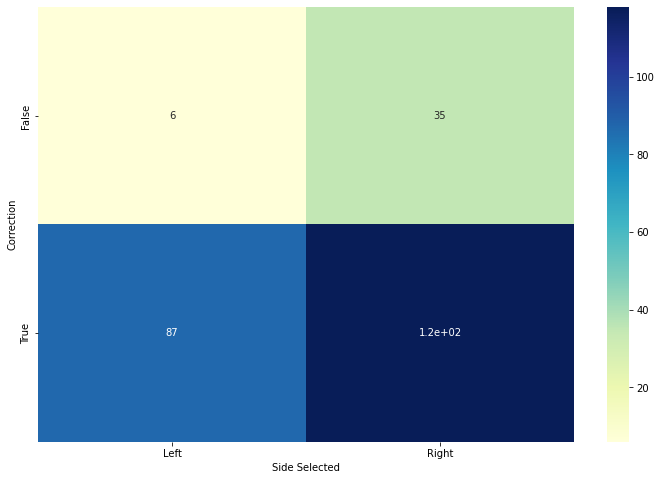

In [ ]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(contigency_2305, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency_2305) # Print the p-value

print("Valor p ",p)
if (p < 0.05):
  print("Se rechaza la Hipotesis Nula")

Valor p  0.0014966522713365518
Se rechaza la Hipotesis Nula


### Correlation Tests - Ain Et All

In [ ]:
from itertools import combinations
comb = combinations(range(1,10), 2)
comb_list = list(comb)
print(comb_list)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [ ]:
true_values = df_2305['Correction'].value_counts()
true_values

True     205
False     41
Name: Correction, dtype: int64

In [ ]:
data_list = []
for item in comb_list:
  c0= item[0]
  c1 = item[1]
  temp_df = df_2305[((df_2305["C_0"] == c0) &  (df_2305["C_1"] == c1)) | ((df_2305["C_0"] == c1) &  (df_2305["C_1"] == c0))  ]
  if temp_df.shape[0] != 0:
    true_values = temp_df['Correction'].sum()
    total = temp_df.shape[0]
    percentaje = true_values/total * 100
    dot_sum = c0+c1
    dot_dif = abs(c0-c1)
    ratio= min(c0,c1)/max(c0,c1)
    print('Valor 1:',c0,'Valor 2:',c1,'Total de Experimentos',total)
    data_list.append([c0,c1,dot_sum,dot_dif,ratio,percentaje])

new_df_2305 = pd.DataFrame(columns=['Valor 1', 'Valor 2','Total','Diferencia','Ratio','Porcentaje'], data=data_list)
new_df_2305

Valor 1: 1 Valor 2: 2 Total de Experimentos 34
Valor 1: 1 Valor 2: 3 Total de Experimentos 18
Valor 1: 1 Valor 2: 4 Total de Experimentos 19
Valor 1: 1 Valor 2: 5 Total de Experimentos 31
Valor 1: 2 Valor 2: 3 Total de Experimentos 29
Valor 1: 2 Valor 2: 4 Total de Experimentos 27
Valor 1: 2 Valor 2: 5 Total de Experimentos 16
Valor 1: 3 Valor 2: 4 Total de Experimentos 29
Valor 1: 3 Valor 2: 5 Total de Experimentos 22
Valor 1: 4 Valor 2: 5 Total de Experimentos 21


,Valor 1,Valor 2,Total,Diferencia,Ratio,Porcentaje
0,1,2,3,1,0.500000,91.176471
1,1,3,4,2,0.333333,94.444444
2,1,4,5,3,0.250000,94.736842
3,1,5,6,4,0.200000,96.774194
4,2,3,5,1,0.666667,89.655172
5,2,4,6,2,0.500000,77.777778
6,2,5,7,3,0.400000,100.000000
7,3,4,7,1,0.750000,68.965517
8,3,5,8,2,0.600000,72.727273
9,4,5,9,1,0.800000,47.619048


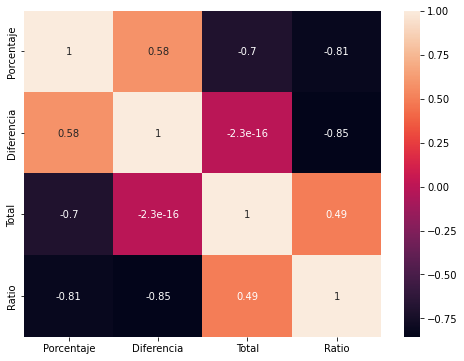

In [ ]:
corr_values__2305= new_df_2305[['Porcentaje', 'Diferencia','Total','Ratio']]
corr_df_2305 = corr_values__2305.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df_2305, annot=True)
plt.show()


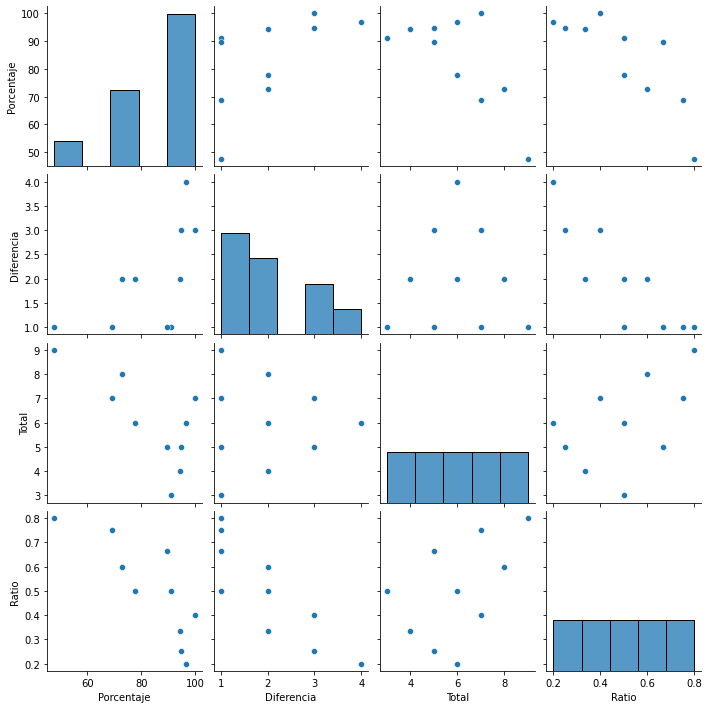

In [ ]:
sns.pairplot(corr_values__2305[['Porcentaje', 'Diferencia','Total','Ratio']])
plt.show()

# Lorenzo 21 de Mayo


In [ ]:
#Carga de datos

lorenzo_2105_file = "/content/2022-05-21_17_3430.141-InCA-BCT-Lorenzo_trained_by_JeremyMASKED.csv"
df_2105 = pd.read_csv(lorenzo_2105_file)
df_2105.head()

,Test no,Test Name,Learner,Trainer,C_0,C_1,C_2,C_3,C_4,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,rect,Lorenzo,Jeremy,5,3,NaN,NaN,NaN,5,True,[2022-05-21 17:05(11.171)],721,background black - foreground green
1,2,rect,Lorenzo,Jeremy,1,2,NaN,NaN,NaN,2,True,[2022-05-21 17:05(16.593)],4418,background black - foreground green
2,3,rect,Lorenzo,Jeremy,3,1,NaN,NaN,NaN,3,True,[2022-05-21 17:05(20.259)],2658,background black - foreground green
3,4,rect,Lorenzo,Jeremy,2,3,NaN,NaN,NaN,3,True,[2022-05-21 17:05(23.910)],2646,background black - foreground green
4,5,rect,Lorenzo,Jeremy,3,6,NaN,NaN,NaN,6,True,[2022-05-21 17:05(27.591)],2675,background black - foreground green


In [ ]:
#Fix column names
df_2105.columns = ['Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1', 'C_2','C_3','C_4','Value selected','Correction','Date','Answering Time (ms)','Other Parameters']
df_2105.head()

,Test No,Test Name,Learner,Trainer,C_0,C_1,C_2,C_3,C_4,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,rect,Lorenzo,Jeremy,5,3,NaN,NaN,NaN,5,True,[2022-05-21 17:05(11.171)],721,background black - foreground green
1,2,rect,Lorenzo,Jeremy,1,2,NaN,NaN,NaN,2,True,[2022-05-21 17:05(16.593)],4418,background black - foreground green
2,3,rect,Lorenzo,Jeremy,3,1,NaN,NaN,NaN,3,True,[2022-05-21 17:05(20.259)],2658,background black - foreground green
3,4,rect,Lorenzo,Jeremy,2,3,NaN,NaN,NaN,3,True,[2022-05-21 17:05(23.910)],2646,background black - foreground green
4,5,rect,Lorenzo,Jeremy,3,6,NaN,NaN,NaN,6,True,[2022-05-21 17:05(27.591)],2675,background black - foreground green


In [ ]:
##Eliminamos algunas columnas
df_2105.drop(['C_2','C_3','C_4','Trainer','Date','Answering Time (ms)','Other Parameters'],axis=1,inplace=True)

In [ ]:
#Visualizacion del dataframe
df_2105.head()

,Test No,Test Name,Learner,C_0,C_1,Value selected,Correction
0,1,rect,Lorenzo,5,3,5,True
1,2,rect,Lorenzo,1,2,2,True
2,3,rect,Lorenzo,3,1,3,True
3,4,rect,Lorenzo,2,3,3,True
4,5,rect,Lorenzo,3,6,6,True


In [ ]:
#Descripcion de datos
df_2105.describe()

,Test No,C_0,C_1,Value selected
count,340.000000,340.000000,340.000000,340.000000
mean,170.500000,3.435294,3.508824,4.476471
std,98.293777,1.701619,1.711469,1.324616
min,1.000000,1.000000,1.000000,1.000000
25%,85.750000,2.000000,2.000000,4.000000
50%,170.500000,3.000000,4.000000,5.000000
75%,255.250000,5.000000,5.000000,6.000000
max,340.000000,6.000000,6.000000,6.000000


In [ ]:
#Tamaño DF
df_2105.shape

(340, 7)

### Binominal Test

In [ ]:
df_2105['Correction'].value_counts()

True     293
False     47
Name: Correction, dtype: int64

We have 293 True values and 47 False Values

In [ ]:
k_2105 = 293
n_2105 = 340
p = 0.5
res = binom_test(k_2105, n_2105, p,alternative='greater')
if (res < 0.05):
  print('Lorenzo was ', k_2105/n_2105 *100 , '% Correct ( p=',res  , '< 0.05)')
else:
  print('Lorenzo might choosen by chance ( p=',res, '>0.05)' )

Lorenzo was  86.1764705882353 % Correct ( p= 6.973798172530687e-45 < 0.05)


### Chi Squared Test For Side-Bias

In [ ]:
side_selected_2105 = df_2105["C_0"] == df_2105["Value selected"]
side_selected_2105 = side_selected_2105.map({True: 'Left', False: 'Right'})
df_2105.insert (6, "Side Selected", side_selected_2105)
df_2105.head()

,Test No,Test Name,Learner,C_0,C_1,Value selected,Side Selected,Correction
0,1,rect,Lorenzo,5,3,5,Left,True
1,2,rect,Lorenzo,1,2,2,Right,True
2,3,rect,Lorenzo,3,1,3,Left,True
3,4,rect,Lorenzo,2,3,3,Right,True
4,5,rect,Lorenzo,3,6,6,Right,True


In [ ]:
## Porcentajes por Correccion
contigency_2105= pd.crosstab(df_2105['Correction'], df_2105['Side Selected'], normalize='index')
contigency_2105

Side Selected,Left,Right
Correction,,
False,0.234043,0.765957
True,0.460751,0.539249


In [ ]:
## Porcentajes por lado (Side)
contigency_2105= pd.crosstab(df_2105['Correction'], df_2105['Side Selected'], normalize='columns')
contigency_2105

Side Selected,Left,Right
Correction,,
False,0.075342,0.185567
True,0.924658,0.814433


In [ ]:
contigency_2105= pd.crosstab(df_2105['Correction'], df_2105['Side Selected'])
contigency_2105

Side Selected,Left,Right
Correction,,
False,11,36
True,135,158


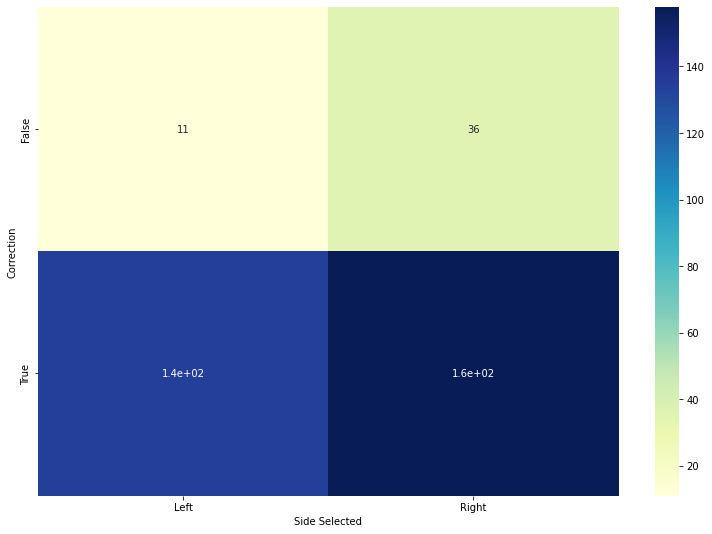

In [ ]:
#Heatmap
plt.figure(figsize=(13,9))
sns.heatmap(contigency_2105, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency_2105) # Print the p-value

print("Valor p ",p)
if (p < 0.05):
  print("Se rechaza la Hipotesis Nula")

Valor p  0.005849419257480392
Se rechaza la Hipotesis Nula


### Correlation Tests - Ain Et All

In [ ]:
from itertools import combinations
comb = combinations(range(1,10), 2)
comb_list = list(comb)
print(comb_list)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [ ]:
true_values = df_2105['Correction'].value_counts()
true_values

True     293
False     47
Name: Correction, dtype: int64

In [ ]:
data_list = []
for item in comb_list:
  c0= item[0]
  c1 = item[1]
  temp_df = df_2105[((df_2105["C_0"] == c0) &  (df_2105["C_1"] == c1)) | ((df_2105["C_0"] == c1) &  (df_2105["C_1"] == c0))  ]
  if temp_df.shape[0] != 0:
    true_values = temp_df['Correction'].sum()
    total = temp_df.shape[0]
    percentaje = true_values/total * 100
    dot_sum = c0+c1
    dot_dif = abs(c0-c1)
    ratio= min(c0,c1)/max(c0,c1)
    print('Valor 1:',c0,'Valor 2:',c1,'Total de Experimentos',total)
    data_list.append([c0,c1,dot_sum,dot_dif,ratio,percentaje])

new_df_2105 = pd.DataFrame(columns=['Valor 1', 'Valor 2','Total','Diferencia','Ratio','Porcentaje'], data=data_list)
new_df_2105

Valor 1: 1 Valor 2: 2 Total de Experimentos 21
Valor 1: 1 Valor 2: 3 Total de Experimentos 21
Valor 1: 1 Valor 2: 4 Total de Experimentos 17
Valor 1: 1 Valor 2: 5 Total de Experimentos 31
Valor 1: 1 Valor 2: 6 Total de Experimentos 31
Valor 1: 2 Valor 2: 3 Total de Experimentos 21
Valor 1: 2 Valor 2: 4 Total de Experimentos 19
Valor 1: 2 Valor 2: 5 Total de Experimentos 23
Valor 1: 2 Valor 2: 6 Total de Experimentos 19
Valor 1: 3 Valor 2: 4 Total de Experimentos 34
Valor 1: 3 Valor 2: 5 Total de Experimentos 25
Valor 1: 3 Valor 2: 6 Total de Experimentos 18
Valor 1: 4 Valor 2: 5 Total de Experimentos 20
Valor 1: 4 Valor 2: 6 Total de Experimentos 26
Valor 1: 5 Valor 2: 6 Total de Experimentos 14


,Valor 1,Valor 2,Total,Diferencia,Ratio,Porcentaje
0,1,2,3,1,0.500000,85.714286
1,1,3,4,2,0.333333,90.476190
2,1,4,5,3,0.250000,94.117647
3,1,5,6,4,0.200000,96.774194
4,1,6,7,5,0.166667,100.000000
5,2,3,5,1,0.666667,85.714286
6,2,4,6,2,0.500000,94.736842
7,2,5,7,3,0.400000,100.000000
8,2,6,8,4,0.333333,100.000000
9,3,4,7,1,0.750000,67.647059


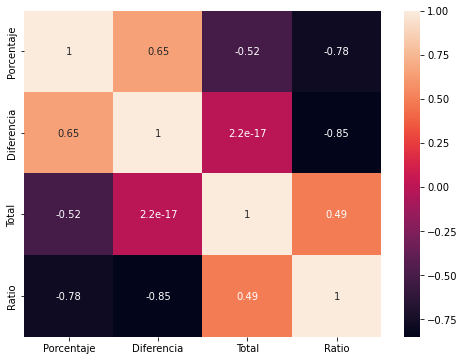

In [ ]:
corr_values__2105= new_df_2105[['Porcentaje', 'Diferencia','Total','Ratio']]
corr_df_2105 = corr_values__2105.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df_2105, annot=True)
plt.show()

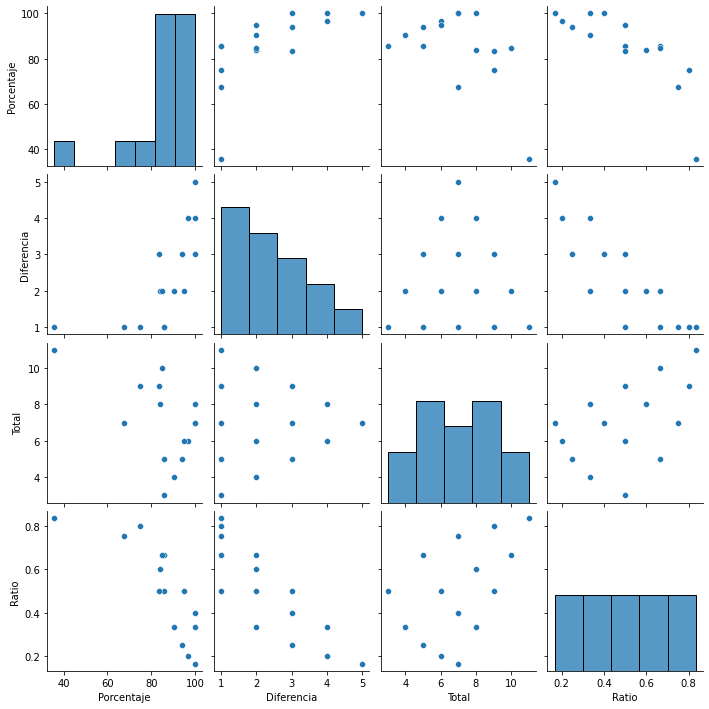

In [ ]:
sns.pairplot(corr_values__2105[['Porcentaje', 'Diferencia','Total','Ratio']])
plt.show()

# Lorenzo All Data 2 values

In [ ]:
def clean_dataframe(input_df):
  df = input_df.copy()
  df.columns = ['Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1', 'C_2','C_3','C_4','Value selected','Correction','Date','Answering Time (ms)','Other Parameters']
  df.drop(['C_2','C_3','C_4','Trainer','Answering Time (ms)','Other Parameters'],axis=1,inplace=True)
  return df

def delete_rows_2_values(input_df):
  index = input_df.apply(pd.Series.first_valid_index)[6]
  last= input_df.shape[0]
  if not np.isnan(index):
    print('Se eliminaran las filas desde ',index,'hasta ',last)
    input_df.drop(input_df.index[int(index):last], axis=0, inplace=True)
    return input_df
  return input_df

In [ ]:
data = []

for filename in os.listdir('/content/2_values/'):
    if filename.endswith("csv"):
        # Your code comes here such as
        data.append('/content/2_values/'+filename)

df_all = pd.DataFrame(columns=['Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1','Value selected','Correction','Date','Answering Time (ms)','Other Parameters'])

for filename in data:
  df = pd.read_csv(filename)
  df = delete_rows_2_values(df)
  df = clean_dataframe(df)
  if df.shape[0]!= 0 :
    df_all = df_all.append(df)
df_all

Se eliminaran las filas desde  21.0 hasta  275
Se eliminaran las filas desde  80.0 hasta  180


,Test No,Test Name,Learner,Trainer,C_0,C_1,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,dice,Lorenzo,NaN,3,2,2,False,[2022-05-24 10:46(42.784)],NaN,NaN
1,2,dice,Lorenzo,NaN,5,2,5,True,[2022-05-24 10:46(45.415)],NaN,NaN
2,3,dice,Lorenzo,NaN,4,2,2,False,[2022-05-24 10:46(52.547)],NaN,NaN
3,4,dice,Lorenzo,NaN,3,4,4,True,[2022-05-24 10:46(54.317)],NaN,NaN
4,5,dice,Lorenzo,NaN,4,2,2,False,[2022-05-24 10:46(57.240)],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
133,134,heap,Lorenzo,NaN,2,5,5,True,[2022-05-24 17:15(51.835)],NaN,NaN
134,135,heap,Lorenzo,NaN,3,2,3,True,[2022-05-24 17:15(56.442)],NaN,NaN
135,136,heap,Lorenzo,NaN,2,1,2,True,[2022-05-24 17:15(59.682)],NaN,NaN
136,137,heap,Lorenzo,NaN,3,5,5,True,[2022-05-24 17:16(06.655)],NaN,NaN


In [ ]:
#Visualizacion del dataframe
df_all.head()

,Test No,Test Name,Learner,Trainer,C_0,C_1,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,dice,Lorenzo,NaN,3,2,2,False,[2022-05-24 10:46(42.784)],NaN,NaN
1,2,dice,Lorenzo,NaN,5,2,5,True,[2022-05-24 10:46(45.415)],NaN,NaN
2,3,dice,Lorenzo,NaN,4,2,2,False,[2022-05-24 10:46(52.547)],NaN,NaN
3,4,dice,Lorenzo,NaN,3,4,4,True,[2022-05-24 10:46(54.317)],NaN,NaN
4,5,dice,Lorenzo,NaN,4,2,2,False,[2022-05-24 10:46(57.240)],NaN,NaN


In [ ]:
#Descripcion de datos
df_all.describe()

,Test No,Test Name,Learner,Trainer,C_0,C_1,Value selected,Correction,Date,Answering Time (ms),Other Parameters
count,1214,1214,1214,0,1214,1214,1214,1214,1214,0,0
unique,340,4,1,0,6,6,6,2,1214,0,0
top,1,dice,Lorenzo,NaN,1,4,5,True,[2022-05-24 10:46(42.784)],NaN,NaN
freq,8,449,1214,NaN,245,237,364,993,1,NaN,NaN


In [ ]:
#Tamaño DF
df_all.shape

(1214, 11)

In [ ]:
df_all['Test Name'].value_counts()


 dice    449
 heap    400
 rect    262
 disc    103
Name: Test Name, dtype: int64

## Binomial Test

In [ ]:
df_all['Correction'].value_counts()


True     993
False    221
Name: Correction, dtype: int64

In [ ]:
k_all = df_all['Correction'].value_counts()[1]
n_all = df_all.shape[0]
print('Veces correctas',k_all,'Total de Experimentos',n_all)
p = 0.5
res = binom_test(k_all, n_all, p,alternative='greater')
if (res < 0.05):
  print('Lorenzo was ', k_all/n_all *100 , '% Correct ( p=',res  , '< 0.05)')
else:
  print('Lorenzo might choosen by chance ( p=',res, '>0.05)' )

Veces correctas 993 Total de Experimentos 1214
Lorenzo was  81.79571663920923 % Correct ( p= 1.9541804800051305e-117 < 0.05)


## Chi squared Test for Side Bias

In [ ]:
side_selected_all = df_all["C_0"] == df_all["Value selected"]
side_selected_all = side_selected_all.map({True: 'Left', False: 'Right'})
df_all.insert (6, "Side Selected", side_selected_all)
df_all.head()

,Test No,Test Name,Learner,Trainer,C_0,C_1,Side Selected,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,dice,Lorenzo,NaN,3,2,Right,2,False,[2022-05-24 10:46(42.784)],NaN,NaN
1,2,dice,Lorenzo,NaN,5,2,Left,5,True,[2022-05-24 10:46(45.415)],NaN,NaN
2,3,dice,Lorenzo,NaN,4,2,Right,2,False,[2022-05-24 10:46(52.547)],NaN,NaN
3,4,dice,Lorenzo,NaN,3,4,Right,4,True,[2022-05-24 10:46(54.317)],NaN,NaN
4,5,dice,Lorenzo,NaN,4,2,Right,2,False,[2022-05-24 10:46(57.240)],NaN,NaN


In [ ]:
## Porcentajes por Correccion
contigency_all= pd.crosstab(df_all['Correction'], df_all['Side Selected'], normalize='index')
contigency_all

Side Selected,Left,Right
Correction,,
False,0.158371,0.841629
True,0.419940,0.580060


In [ ]:
## Porcentajes por lado (Side)
contigency_all= pd.crosstab(df_all['Correction'], df_all['Side Selected'], normalize='columns')
contigency_all

Side Selected,Left,Right
Correction,,
False,0.077434,0.244094
True,0.922566,0.755906


In [ ]:
contigency_all= pd.crosstab(df_all['Correction'], df_all['Side Selected'])
contigency_all

Side Selected,Left,Right
Correction,,
False,35,186
True,417,576


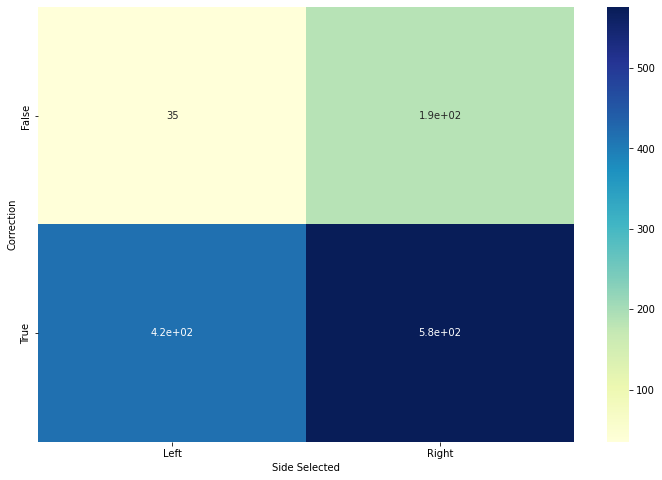

In [ ]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(contigency_all, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency_all) # Print the p-value

print("Valor p ",p)
if (p < 0.05):
  print("No se rechaza la Hipotesis Nula")

Valor p  6.117539357521329e-13
No se rechaza la Hipotesis Nula


## Correlation Test - Ain Et All

In [ ]:
from itertools import combinations
comb = combinations(range(1,6), 2)
comb_list = list(comb)
print(comb_list)

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


In [ ]:
true_values = df_all['Correction'].value_counts()
true_values

True     993
False    221
Name: Correction, dtype: int64

In [ ]:
data_list = []
for item in comb_list:
  c0= item[0]
  c1 = item[1]
  temp_df = df_all[((df_all["C_0"] == c0) &  (df_all["C_1"] == c1)) | ((df_all["C_0"] == c1) &  (df_all["C_1"] == c0))  ]
  if temp_df.shape[0] != 0:
    true_values = temp_df['Correction'].sum()
    total = temp_df.shape[0]
    percentaje = true_values/total * 100
    dot_sum = c0+c1
    dot_dif = abs(c0-c1)
    ratio= min(c0,c1)/max(c0,c1)
    print('Valor 1:',c0,'Valor 2:',c1,'Total de Experimentos',total)
    data_list.append([c0,c1,dot_sum,dot_dif,ratio,percentaje])

new_df_all = pd.DataFrame(columns=['Value 1', 'Value 2','Total','Difference','Ratio','Accuracy'], data=data_list)
new_df_all

Valor 1: 1 Valor 2: 2 Total de Experimentos 113
Valor 1: 1 Valor 2: 3 Total de Experimentos 102
Valor 1: 1 Valor 2: 4 Total de Experimentos 105
Valor 1: 1 Valor 2: 5 Total de Experimentos 125
Valor 1: 2 Valor 2: 3 Total de Experimentos 107
Valor 1: 2 Valor 2: 4 Total de Experimentos 116
Valor 1: 2 Valor 2: 5 Total de Experimentos 98
Valor 1: 3 Valor 2: 4 Total de Experimentos 122
Valor 1: 3 Valor 2: 5 Total de Experimentos 115
Valor 1: 4 Valor 2: 5 Total de Experimentos 103


,Value 1,Value 2,Total,Difference,Ratio,Accuracy
0,1,2,3,1,0.500000,81.415929
1,1,3,4,2,0.333333,90.196078
2,1,4,5,3,0.250000,93.333333
3,1,5,6,4,0.200000,94.400000
4,2,3,5,1,0.666667,82.242991
5,2,4,6,2,0.500000,81.034483
6,2,5,7,3,0.400000,96.938776
7,3,4,7,1,0.750000,67.213115
8,3,5,8,2,0.600000,73.913043
9,4,5,9,1,0.800000,55.339806


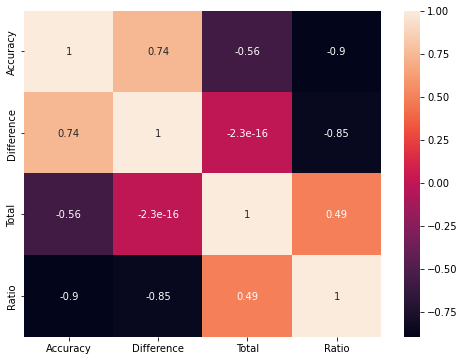

In [ ]:
corr_values__all= new_df_all[['Accuracy', 'Difference','Total','Ratio']]
corr_df_all = corr_values__all.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df_all, annot=True)
plt.show()

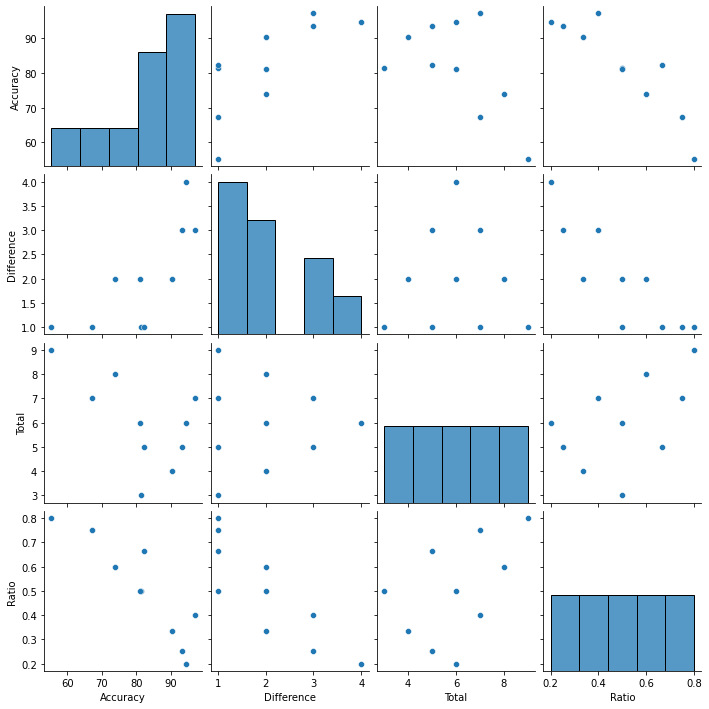

In [ ]:
sns.pairplot(corr_values__all[['Accuracy', 'Difference','Total','Ratio']])
plt.show()

## Dataframe

In [ ]:
def binominal_test_df(input_df):
  values = input_df['Correction'].value_counts()
  k = values[1]
  n = values[1]+values[0]
  p = 0.5
  res = binom_test(k, n, p,alternative='greater')
  p_formated = format_p(res)
  prob = k/n * 100
  res_formated = format_res(prob)
  #return [res,prob]
  return res_formated+' '+p_formated

def filter_by_test_df(input_df,testname):
  filtered_df = input_df[input_df["Test Name"].str.contains(testname)]
  return filtered_df

def get_results(input_df,testname,array):
 # print(testname)
  df = filter_by_test_df(input_df,testname)
  if df.shape[0] != 0:
    result = binominal_test_df(df)
    #p = sn.format(result[0],2)
    #percentage = np.round(result[1])
    #if p != 'None':
    #  array.append(str(percentage)+' '+p)
    #else:
    #  array.append(['none'])
    array.append(result)
  else:
    array.append('Insufficient Data')

def get_parcial_results(input_df,first_test,second_test,array):
  df = input_df[input_df["Test Name"].str.contains(first_test)| input_df["Test Name"].str.contains(second_test)]
  if df.shape[0] != 0:
    result = binominal_test_df(df)
    # p = sn.format(result[0],2)
    # percentage = np.round(result[1])
    #if p != 'None':
    #  array.append(str(percentage)+' '+p)
    #else:
    #  array.append(['none'])
    array.append(result)
  else:
    array.append('Insufficient Data')

def get_average_total(input_df):
    result = binominal_test_df(input_df)
    #p = sn.format(result[0],2)
    #percentage = np.round(result[1])
    #if p != 'None':
    #  array = [str(percentage)+' '+p]
    array = [result]
    total = pd.DataFrame(columns=['Total'], data= [array])
    return total

def generate_dataframe(input_df):
    tests =  ['dice','heap','discrete','disc','rect','continuous']
    array = [input_df.Date[0][2:18]]
    total = get_average_total(input_df)
    for test in tests:
      if test == 'discrete':
        get_parcial_results(input_df,'dice','heap',array)
        continue
      if test == 'continuous':
        get_parcial_results(input_df,'disc','rect',array)
        continue
      else:
        get_results(input_df,test,array)
    new_df = pd.DataFrame(columns=['Session', 'Dice','Heap','Discrete','Disc','Rect','Continuous'], data=[array])
    new_df['Total'] = total
    return new_df

def format_p(number):
  scientific_notation ='{:.0e}'.format(number)
  base = scientific_notation[:1]
  exp = scientific_notation[-3:]
  return '('+str(base)+'e^{'+str(exp)+'})$'
def format_res(number):
  return '$'+str(int(number))

In [ ]:

total_results = generate_dataframe(df_all)
total_results

# Lorenzo All Data 3 values

In [ ]:
def clean_dataframe_3_values(input_df):
  df = input_df.copy()
  df.columns = ['index','Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1', 'C_2','C_3','C_4','Value selected','Correction','Date','Answering Time (ms)','Other Parameters']
  df.drop(['index','C_3','C_4','Trainer','Answering Time (ms)','Other Parameters'],axis=1,inplace=True)
  return df

def delete_rows_3_values(input_df):
  index = input_df.apply(pd.Series.first_valid_index)[6]
  first = 0
  index_2 = input_df.apply(pd.Series.first_valid_index)[7]
  last = input_df.shape[0]
  if not np.isnan(index):
    if not np.isnan(index_2):
      print('Se eliminaran las filas desde ',first,'hasta ',index,' y desde ',index_2,'hasta ',last)
      input_df.drop(np.r_[first:index,int(index_2):last], axis=0, inplace=True)
    else:
      print('Se eliminaran las filas desde ',first,'hasta ',index)
      input_df.drop(input_df.index[first:int(index)], axis=0, inplace=True)
    input_df = input_df.reset_index()
    return input_df
  return input_df

def filter_by_test_df(input_df,testname):
  filtered_df = input_df[input_df["Test Name"].str.contains(testname)]
  return filtered_df

def get_results_3_values(input_df,testname,array):
 # print(testname)
  df = filter_by_test_df(input_df,testname)
  if df.shape[0] != 0:
    result = binominal_test_df_3_values(df)
    #p = sn.format(result[0],2)
    #percentage = np.round(result[1])
    #if p != 'None':
    #  array.append(str(percentage)+' '+p)
    #else:
    #  array.append(['none'])
    array.append(result)
  else:
    array.append('(no data)')


def get_parcial_results_3_values(input_df,first_test,second_test,array):
  df = input_df[input_df["Test Name"].str.contains(first_test)| input_df["Test Name"].str.contains(second_test)]
  if df.shape[0] != 0:
    result = binominal_test_df_3_values(df)
    #p = sn.format(result[0],2)
    #percentage = np.round(result[1])
    #if p != 'None':
    #  array.append(str(percentage)+' '+p)
    #else:
    #  array.append(['none'])
    array.append(result)
  else:
    array.append('(no data)')

def get_average_total_3_values(input_df):
    result = binominal_test_df_3_values(input_df)
    #p = sn.format(result[0],2)
    #percentage = np.round(result[1])
    #if p != 'None':
    array = [result]
    total = pd.DataFrame(columns=['Total'], data= [array])
    return total

def binominal_test_df_3_values(input_df):
    values = input_df['Correction'].value_counts()
    k = values[1]
    n = values[1]+values[0]
    p = 1/3
    res = binom_test(k, n, p,alternative='greater')
    p_formated = format_p(res)
    prob = k/n * 100
    res_formated = format_res(prob)
    #return [res,prob]
    return res_formated+' '+p_formated

def generate_dataframe_3_values(input_df):
    tests =  ['dice','heap','discrete','disc','rect','continuous']
    array = [input_df.Date[0][2:18]]
    total = get_average_total_3_values(input_df)
    for test in tests:
      if test == 'discrete':
        get_parcial_results_3_values(input_df,'dice','heap',array)
        continue
      if test == 'continuous':
        get_parcial_results_3_values(input_df,'disc','rect',array)
        continue
      else:
        get_results_3_values(input_df,test,array)
    new_df = pd.DataFrame(columns=['Session', 'Dice','Heap','Discrete','Disc','Rect','Continuous'], data=[array])
    new_df['Total'] = total
    return new_df




In [ ]:
data = []

for filename in os.listdir('/content/3_values/'):
    if filename.endswith("csv"):
        # Your code comes here such as
        data.append('/content/3_values/'+filename)
print(data)
df_all_3 = pd.DataFrame(columns=['Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1','C_2','Value selected','Correction','Date','Answering Time (ms)','Other Parameters'])

for filename in data:
  df = pd.read_csv(filename)
  df = delete_rows_3_values(df)
  df = clean_dataframe_3_values(df)
  if df.shape[0]!= 0 :
    df_all_3 = df_all_3.append(df)
df_all_3

['/content/3_values/2022-05-19_17_3647.207-InCA-BCT-Lorenzo_trained_by_Jeremy-MASKED.csv', '/content/3_values/2022-05-22_09_2359.67-InCA-BCT-Lorenzo_trained_by_JeremyMASKED.csv', '/content/3_values/2022-05-25_16_4850.91-InCA-BCT-Lorenzo_trained_by_JeremyBASKED.csv', '/content/3_values/2022-05-22_16_4340.19-InCA-BCT-Lorenzo_trained_by_JeremyMASKED.csv']
Se eliminaran las filas desde  0 hasta  80.0
Se eliminaran las filas desde  0 hasta  340.0
Se eliminaran las filas desde  0 hasta  21.0  y desde  121.0 hasta  275
Se eliminaran las filas desde  0 hasta  0.0


,Test No,Test Name,Learner,Trainer,C_0,C_1,C_2,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,81,rect,Lorenzo,NaN,4,2,3.0,3,False,[2022-05-19 17:26(55.124)],NaN,NaN
1,82,rect,Lorenzo,NaN,1,5,2.0,5,True,[2022-05-19 17:26(57.640)],NaN,NaN
2,83,rect,Lorenzo,NaN,1,4,2.0,4,True,[2022-05-19 17:27(03.345)],NaN,NaN
3,84,rect,Lorenzo,NaN,4,3,2.0,4,True,[2022-05-19 17:27(08.325)],NaN,NaN
4,85,rect,Lorenzo,NaN,2,1,4.0,4,True,[2022-05-19 17:27(12.468)],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
252,253,dice,Lorenzo,NaN,3,1,5.0,5,True,[2022-05-22 16:38(30.488)],NaN,NaN
253,254,dice,Lorenzo,NaN,5,4,3.0,3,False,[2022-05-22 16:38(37.889)],NaN,NaN
254,255,dice,Lorenzo,NaN,3,4,1.0,4,True,[2022-05-22 16:38(40.22)],NaN,NaN
255,256,dice,Lorenzo,NaN,4,3,1.0,4,True,[2022-05-22 16:38(44.438)],NaN,NaN


In [ ]:
#Visualizacion del dataframe
df_all_3.head()

,Test No,Test Name,Learner,Trainer,C_0,C_1,C_2,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,81,rect,Lorenzo,NaN,4,2,3.0,3,False,[2022-05-19 17:26(55.124)],NaN,NaN
1,82,rect,Lorenzo,NaN,1,5,2.0,5,True,[2022-05-19 17:26(57.640)],NaN,NaN
2,83,rect,Lorenzo,NaN,1,4,2.0,4,True,[2022-05-19 17:27(03.345)],NaN,NaN
3,84,rect,Lorenzo,NaN,4,3,2.0,4,True,[2022-05-19 17:27(08.325)],NaN,NaN
4,85,rect,Lorenzo,NaN,2,1,4.0,4,True,[2022-05-19 17:27(12.468)],NaN,NaN


In [ ]:
#Descripcion de datos
df_all_3.describe()

,C_2
count,588.000000
mean,2.892857
std,1.397400
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
#Tamaño DF
df_all_3.shape

(588, 12)

In [ ]:
df_all_3['Test Name'].value_counts()


 dice    249
 rect    120
 disc    120
 heap     99
Name: Test Name, dtype: int64

## Binomial Test

In [ ]:
df_all_3['Correction'].value_counts()


True     417
False    171
Name: Correction, dtype: int64

In [ ]:
k_all = df_all_3['Correction'].value_counts()[1]
n_all = df_all_3.shape[0]
print('Veces correctas',k_all,'Total de Experimentos',n_all)
p = 1/3
res = binom_test(k_all, n_all, p,alternative='greater')
if (res < 0.05):
  print('Lorenzo was ', k_all/n_all *100 , '% Correct ( p=',res  , '< 0.05)')
else:
  print('Lorenzo might choosen by chance ( p=',res, '>0.05)' )

Veces correctas 417 Total de Experimentos 588
Lorenzo was  70.91836734693877 % Correct ( p= 3.479968614031425e-77 < 0.05)


## Dataframe

In [ ]:
total_results = generate_dataframe_3_values(df_all_3)
total_results

,Session,Dice,Heap,Discrete,Disc,Rect,Continuous,Total
0,0 [2022-05-25 16:23(12.469)] 0 [2022-0...,$59 (1e^{-17})$,$66 (1e^{-11})$,$61 (2e^{-27})$,$80 (1e^{-25})$,$88 (7e^{-36})$,$84 (2e^{-59})$,$70 (3e^{-77})$


# Lorenzo All Data 4 values

In [ ]:
def clean_dataframe_4_values(input_df):
  df = input_df.copy()
  df.columns = ['index','Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1', 'C_2','C_3','C_4','Value selected','Correction','Date','Answering Time (ms)','Other Parameters']
  df.drop(['index','C_4','Trainer','Answering Time (ms)','Other Parameters'],axis=1,inplace=True)
  return df

def delete_rows_4_values(input_df):
  index= input_df.apply(pd.Series.first_valid_index)[7]
  first=0
  print(index)
  last= input_df.shape[0]
  if not np.isnan(index):
    print('Se eliminaran las filas desde ',first,'hasta ',index)
    input_df.drop(input_df.index[first:int(index)], axis=0, inplace=True)
    input_df = input_df.reset_index()
    return input_df
  return input_df



In [ ]:
data = []

for filename in os.listdir('/content/4_values/'):
    if filename.endswith("csv"):
        # Your code comes here such as
        data.append('/content/4_values/'+filename)
print(data)
df_all = pd.DataFrame(columns=['Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1','C_2','C_3','Value selected','Correction','Date','Answering Time (ms)','Other Parameters'])

for filename in data:
  df = pd.read_csv(filename)
  df = delete_rows_4_values(df)
  df = clean_dataframe_4_values(df)
  if df.shape[0]!= 0 :
    df_all = df_all.append(df)
df_all

['/content/4_values/2022-05-26_09_3726.749-InCA-BCT-Lorenzo_trained_by_JeremyMASKED.csv', '/content/4_values/2022-05-25_16_4850.91-InCA-BCT-Lorenzo_trained_by_JeremyBASKED.csv']
0.0
Se eliminaran las filas desde  0 hasta  0.0
121.0
Se eliminaran las filas desde  0 hasta  121.0


,Test No,Test Name,Learner,Trainer,C_0,C_1,C_2,C_3,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,heap,Lorenzo,NaN,1,4,5,3,5,True,[2022-05-26 09:26(14.973)],NaN,NaN
1,2,heap,Lorenzo,NaN,5,1,4,3,4,False,[2022-05-26 09:26(16.719)],NaN,NaN
2,3,heap,Lorenzo,NaN,1,5,2,4,5,True,[2022-05-26 09:26(18.706)],NaN,NaN
3,4,heap,Lorenzo,NaN,4,5,3,2,5,True,[2022-05-26 09:26(35.68)],NaN,NaN
4,5,heap,Lorenzo,NaN,2,1,4,5,5,True,[2022-05-26 09:26(38.692)],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,271,dice,Lorenzo,NaN,2,3,5.0,4.0,4,False,[2022-05-25 16:45(18.130)],NaN,NaN
150,272,dice,Lorenzo,NaN,5,4,3.0,1.0,4,False,[2022-05-25 16:45(24.293)],NaN,NaN
151,273,dice,Lorenzo,NaN,5,2,3.0,1.0,2,False,[2022-05-25 16:45(26.731)],NaN,NaN
152,274,dice,Lorenzo,NaN,3,4,1.0,5.0,5,True,[2022-05-25 16:45(28.485)],NaN,NaN


In [ ]:
#Visualizacion del dataframe
df_all.head()

,Test No,Test Name,Learner,Trainer,C_0,C_1,C_2,C_3,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,heap,Lorenzo,NaN,1,4,5,3,5,True,[2022-05-26 09:26(14.973)],NaN,NaN
1,2,heap,Lorenzo,NaN,5,1,4,3,4,False,[2022-05-26 09:26(16.719)],NaN,NaN
2,3,heap,Lorenzo,NaN,1,5,2,4,5,True,[2022-05-26 09:26(18.706)],NaN,NaN
3,4,heap,Lorenzo,NaN,4,5,3,2,5,True,[2022-05-26 09:26(35.68)],NaN,NaN
4,5,heap,Lorenzo,NaN,2,1,4,5,5,True,[2022-05-26 09:26(38.692)],NaN,NaN


In [ ]:
#Descripcion de datos
df_all.describe()

,Test No,Test Name,Learner,Trainer,C_0,C_1,C_2,C_3,Value selected,Correction,Date,Answering Time (ms),Other Parameters
count,218,218,218,0,218,218,218,218,218,218,218,0,0
unique,218,3,1,0,5,5,5,5,5,2,218,0,0
top,1,dice,Lorenzo,NaN,4,3,4,2,5,True,[2022-05-26 09:26(14.973)],NaN,NaN
freq,1,154,218,NaN,46,47,50,48,114,136,1,NaN,NaN


In [ ]:
#Tamaño DF
df_all.shape

(218, 13)

In [ ]:
df_all['Test Name'].value_counts()


 dice    154
 heap     51
 disc     13
Name: Test Name, dtype: int64

## Binomial Test

In [ ]:
df_all['Correction'].value_counts()


True     136
False     82
Name: Correction, dtype: int64

In [ ]:
k_all = df_all['Correction'].value_counts()[1]
n_all = df_all.shape[0]
print('Veces correctas',k_all,'Total de Experimentos',n_all)
p = 1/4
res = binom_test(k_all, n_all, p,alternative='greater')
if (res < 0.05):
  print('Lorenzo was ', k_all/n_all *100 , '% Correct ( p=',res  , '< 0.05)')
else:
  print('Lorenzo might choosen by chance ( p=',res, '>0.05)' )

Veces correctas 136 Total de Experimentos 218
Lorenzo was  62.38532110091744 % Correct ( p= 2.5492089854061633e-31 < 0.05)


## Dataframe


In [ ]:
def clean_dataframe_4_values(input_df):
  df = input_df.copy()
  df.columns = ['index','Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1', 'C_2','C_3','C_4','Value selected','Correction','Date','Answering Time (ms)','Other Parameters']
  df.drop(['index','C_4','Trainer','Answering Time (ms)','Other Parameters'],axis=1,inplace=True)
  return df

def binominal_test_df_4_values(input_df):
  values = input_df['Correction'].value_counts()
  k = values[1]
  n = values[1]+values[0]
  p = 1/4
  res = binom_test(k, n, p,alternative='greater')
  p_formated = format_p(res)
  prob = k/n * 100
  res_formated = format_res(prob)
  #return [res,prob]
  return res_formated+' '+p_formated

def get_results_4_values(input_df,testname,array):
 # print(testname)
  df = filter_by_test_df(input_df,testname)
  if df.shape[0] != 0:
    result = binominal_test_df_4_values(df)
    #p = sn.format(result[0],2)
    #percentage = np.round(result[1])
    #if p != 'None':
    #  array.append(str(percentage)+' '+p)
    #else:
    #  array.append(['none'])
    array.append(result)
  else:
    array.append('(no data)')

def get_parcial_results_4_values(input_df,first_test,second_test,array):
  df = input_df[input_df["Test Name"].str.contains(first_test)| input_df["Test Name"].str.contains(second_test)]
  if df.shape[0] != 0:
    result = binominal_test_df_4_values(df)
    #p = sn.format(result[0],2)
    #percentage = np.round(result[1])
    #if p != 'None':
    #  array.append(str(percentage)+' '+p)
    #else:
    #  array.append(['none'])
    array.append(result)
  else:
    array.append('(no data)')

def get_average_total_4_values(input_df):
    result = binominal_test_df_4_values(input_df)
    #p = sn.format(result[0],2)
    #percentage = np.round(result[1])
    #if p != 'None':
    array = [result]
    total = pd.DataFrame(columns=['Total'], data= [array])
    return total

def generate_dataframe_4_values(input_df):
    tests =  ['dice','heap','discrete','disc','rect','continuous']
    array = [input_df.Date[0][2:18]]
    total = get_average_total_4_values(input_df)
    for test in tests:
      if test == 'discrete':
        get_parcial_results_4_values(input_df,'dice','heap',array)
        continue
      if test == 'continuous':
        get_parcial_results_4_values(input_df,'disc','rect',array)
        continue
      else:
        get_results_4_values(input_df,test,array)
    new_df = pd.DataFrame(columns=['Session', 'Dice','Heap','Discrete','Disc','Rect','Continuous'], data=[array])
    new_df['Total'] = total
    return new_df

def delete_rows_4_values(input_df):
  index= input_df.apply(pd.Series.first_valid_index)[7]
  first=0
  print(index)
  last= input_df.shape[0]
  if not np.isnan(index):
    print('Se eliminaran las filas desde ',first,'hasta ',index)
    input_df.drop(input_df.index[first:int(index)], axis=0, inplace=True)
    input_df = input_df.reset_index()
    return input_df
  return input_df


In [ ]:
total_dataframe = generate_dataframe_4_values(df_all)
total_dataframe

,Session,Dice,Heap,Discrete,Disc,Rect,Continuous,Total
0,"Series([], Name: Date, dtype: object)",$59 (7e^{-20})$,$72 (1e^{-12})$,$62 (2e^{-30})$,$53 (2e^{-02})$,(no data),$53 (2e^{-02})$,$62 (3e^{-31})$


# Tina All Data 2 values

In [ ]:
def clean_dataframe(input_df):
  df = input_df.copy()
  df.columns = ['Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1', 'C_2','C_3','C_4','Value selected','Correction','Date','Answering Time (ms)','Other Parameters']
  df.drop(['C_2','C_3','C_4','Trainer','Answering Time (ms)','Other Parameters'],axis=1,inplace=True)
  return df

def delete_rows_2_values(input_df):
  index = input_df.apply(pd.Series.first_valid_index)[6]
  last= input_df.shape[0]
  if not np.isnan(index):
    print('Se eliminaran las filas desde ',index,'hasta ',last)
    input_df.drop(input_df.index[int(index):last], axis=0, inplace=True)
    return input_df
  return input_df

In [ ]:
data = []

for filename in os.listdir('/content/tina/'):
    if filename.endswith("csv"):
        # Your code comes here such as
        data.append('/content/tina/'+filename)

df_all = pd.DataFrame(columns=['Test No','Test Name', 'Learner', 'Trainer', 'C_0', 'C_1','Value selected','Correction','Date','Answering Time (ms)','Other Parameters'])

for filename in data:
  df = pd.read_csv(filename)
  df = delete_rows_2_values(df)
  df = clean_dataframe(df)
  if df.shape[0]!= 0 :
    df_all = df_all.append(df)
df_all

Se eliminaran las filas desde  0.0 hasta  57


<ipython-input-5-b01e3b3390c4>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df)
<ipython-input-5-b01e3b3390c4>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df)
<ipython-input-5-b01e3b3390c4>:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_all = df_all.append(df)
<ipython-input-5-b01e3b3390c4>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df)
<ipython-input-5-b01e3b3390c4>:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Exp

,Test No,Test Name,Learner,Trainer,C_0,C_1,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,disc,Tina,NaN,5,4,5,True,[2022-05-24 08:07(46.349)],NaN,NaN
1,2,disc,Tina,NaN,2,1,2,True,[2022-05-24 08:08(01.851)],NaN,NaN
2,3,disc,Tina,NaN,5,3,5,True,[2022-05-24 08:08(13.344)],NaN,NaN
3,4,disc,Tina,NaN,5,2,5,True,[2022-05-24 08:08(24.986)],NaN,NaN
4,5,disc,Tina,NaN,2,5,5,True,[2022-05-24 08:08(31.52)],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
78,79,disc,Tina,NaN,5,2,5,True,[2022-05-24 17:15(42.430)],NaN,NaN
79,80,disc,Tina,NaN,3,5,5,True,[2022-05-24 17:15(52.417)],NaN,NaN
80,81,disc,Tina,NaN,5,2,2,False,[2022-05-24 17:16(03.911)],NaN,NaN
81,82,disc,Tina,NaN,5,2,2,False,[2022-05-24 17:16(08.364)],NaN,NaN


In [ ]:
#Visualizacion del dataframe
df_all.head()

,Test No,Test Name,Learner,Trainer,C_0,C_1,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,disc,Tina,NaN,5,4,5,True,[2022-05-24 08:07(46.349)],NaN,NaN
1,2,disc,Tina,NaN,2,1,2,True,[2022-05-24 08:08(01.851)],NaN,NaN
2,3,disc,Tina,NaN,5,3,5,True,[2022-05-24 08:08(13.344)],NaN,NaN
3,4,disc,Tina,NaN,5,2,5,True,[2022-05-24 08:08(24.986)],NaN,NaN
4,5,disc,Tina,NaN,2,5,5,True,[2022-05-24 08:08(31.52)],NaN,NaN


In [ ]:
#Descripcion de datos
df_all.describe()

,Test No,Test Name,Learner,Trainer,C_0,C_1,Value selected,Correction,Date,Answering Time (ms),Other Parameters
count,409,409,409,0,409,409,409,409,409,0,0
unique,146,3,1,0,7,7,7,2,409,0,0
top,1,disc,Tina,NaN,5,5,5,True,[2022-05-24 08:07(46.349)],NaN,NaN
freq,4,193,409,NaN,82,99,134,303,1,NaN,NaN


In [ ]:
#Tamaño DF
df_all.shape

(409, 11)

In [ ]:
df_all['Test Name'].value_counts()


 disc    193
 dice    190
 rect     26
Name: Test Name, dtype: int64

## Binomial Test

In [ ]:
df_all['Correction'].value_counts()


True     303
False    106
Name: Correction, dtype: int64

In [ ]:
k_all = df_all['Correction'].value_counts()[1]
n_all = df_all.shape[0]
print('Veces correctas',k_all,'Total de Experimentos',n_all)
p = 0.5
res = binom_test(k_all, n_all, p,alternative='greater')
if (res < 0.05):
  print('Lorenzo was ', k_all/n_all *100 , '% Correct ( p=',res  , '< 0.05)')
else:
  print('Lorenzo might choosen by chance ( p=',res, '>0.05)' )

Veces correctas 106 Total de Experimentos 409
Lorenzo might choosen by chance ( p= 1.0 >0.05)


<ipython-input-12-a8157d552c0f>:5: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  res = binom_test(k_all, n_all, p,alternative='greater')


## Chi squared Test for Side Bias

In [ ]:
side_selected_all = df_all["C_0"] == df_all["Value selected"]
side_selected_all = side_selected_all.map({True: 'Left', False: 'Right'})
df_all.insert (6, "Side Selected", side_selected_all)
df_all.head()

,Test No,Test Name,Learner,Trainer,C_0,C_1,Side Selected,Value selected,Correction,Date,Answering Time (ms),Other Parameters
0,1,disc,Tina,NaN,5,4,Left,5,True,[2022-05-24 08:07(46.349)],NaN,NaN
1,2,disc,Tina,NaN,2,1,Left,2,True,[2022-05-24 08:08(01.851)],NaN,NaN
2,3,disc,Tina,NaN,5,3,Left,5,True,[2022-05-24 08:08(13.344)],NaN,NaN
3,4,disc,Tina,NaN,5,2,Left,5,True,[2022-05-24 08:08(24.986)],NaN,NaN
4,5,disc,Tina,NaN,2,5,Right,5,True,[2022-05-24 08:08(31.52)],NaN,NaN


In [ ]:
## Porcentajes por Correccion
contigency_all= pd.crosstab(df_all['Correction'], df_all['Side Selected'], normalize='index')
contigency_all

Side Selected,Left,Right
Correction,,
False,0.584906,0.415094
True,0.501650,0.498350


In [ ]:
## Porcentajes por lado (Side)
contigency_all= pd.crosstab(df_all['Correction'], df_all['Side Selected'], normalize='columns')
contigency_all

Side Selected,Left,Right
Correction,,
False,0.28972,0.225641
True,0.71028,0.774359


In [ ]:
contigency_all= pd.crosstab(df_all['Correction'], df_all['Side Selected'])
contigency_all

Side Selected,Left,Right
Correction,,
False,62,44
True,152,151


<Axes: xlabel='Side Selected', ylabel='Correction'>

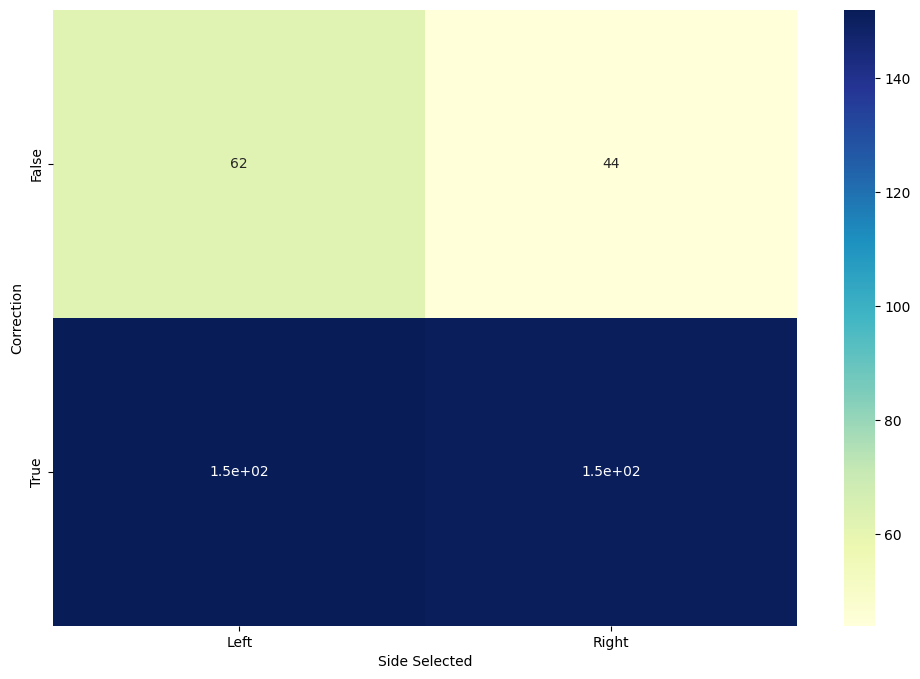

In [ ]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(contigency_all, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency_all) # Print the p-value

print("Valor p ",p)
if (p < 0.05):
  print("No se rechaza la Hipotesis Nula")

Valor p  0.17251036064107284


## Correlation Test - Ain Et All

In [ ]:
from itertools import combinations
comb = combinations(range(1,10), 2)
comb_list = list(comb)
print(comb_list)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [ ]:
true_values = df_all['Correction'].value_counts()
true_values

True     303
False    106
Name: Correction, dtype: int64

In [ ]:
data_list = []
for item in comb_list:
  c0= item[0]
  c1 = item[1]
  temp_df = df_all[((df_all["C_0"] == c0) &  (df_all["C_1"] == c1)) | ((df_all["C_0"] == c1) &  (df_all["C_1"] == c0))  ]
  if temp_df.shape[0] != 0:
    true_values = temp_df['Correction'].sum()
    total = temp_df.shape[0]
    percentaje = true_values/total * 100
    dot_sum = c0+c1
    dot_dif = abs(c0-c1)
    ratio= min(c0,c1)/max(c0,c1)
    print('Valor 1:',c0,'Valor 2:',c1,'Total de Experimentos',total)
    data_list.append([c0,c1,dot_sum,dot_dif,ratio,percentaje])

new_df_all = pd.DataFrame(columns=['Value 1', 'Value 2','Total','Difference','Ratio','Accuracy'], data=data_list)
new_df_all

Valor 1: 1 Valor 2: 2 Total de Experimentos 26
Valor 1: 1 Valor 2: 3 Total de Experimentos 24
Valor 1: 1 Valor 2: 4 Total de Experimentos 23
Valor 1: 1 Valor 2: 5 Total de Experimentos 18
Valor 1: 2 Valor 2: 3 Total de Experimentos 33
Valor 1: 2 Valor 2: 4 Total de Experimentos 29
Valor 1: 2 Valor 2: 5 Total de Experimentos 30
Valor 1: 3 Valor 2: 4 Total de Experimentos 24
Valor 1: 3 Valor 2: 5 Total de Experimentos 24
Valor 1: 4 Valor 2: 5 Total de Experimentos 32
Valor 1: 5 Valor 2: 9 Total de Experimentos 31


,Value 1,Value 2,Total,Difference,Ratio,Accuracy
0,1,2,3,1,0.500000,69.230769
1,1,3,4,2,0.333333,70.833333
2,1,4,5,3,0.250000,78.260870
3,1,5,6,4,0.200000,94.444444
4,2,3,5,1,0.666667,57.575758
5,2,4,6,2,0.500000,68.965517
6,2,5,7,3,0.400000,76.666667
7,3,4,7,1,0.750000,45.833333
8,3,5,8,2,0.600000,70.833333
9,4,5,9,1,0.800000,71.875000


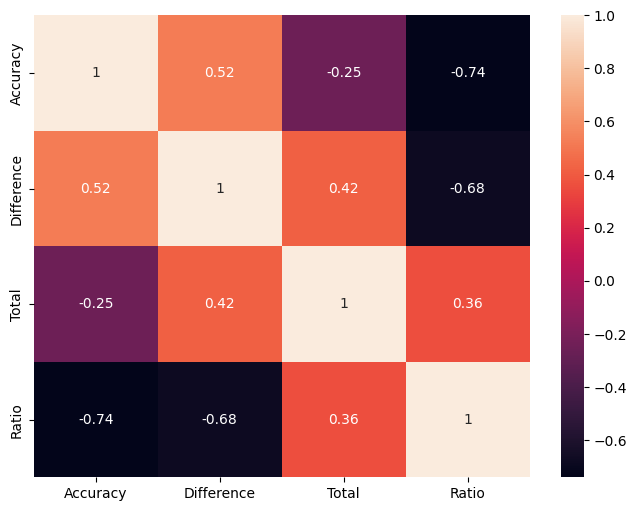

In [ ]:
corr_values__all= new_df_all[['Accuracy', 'Difference','Total','Ratio']]
corr_df_all = corr_values__all.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df_all, annot=True)
plt.show()

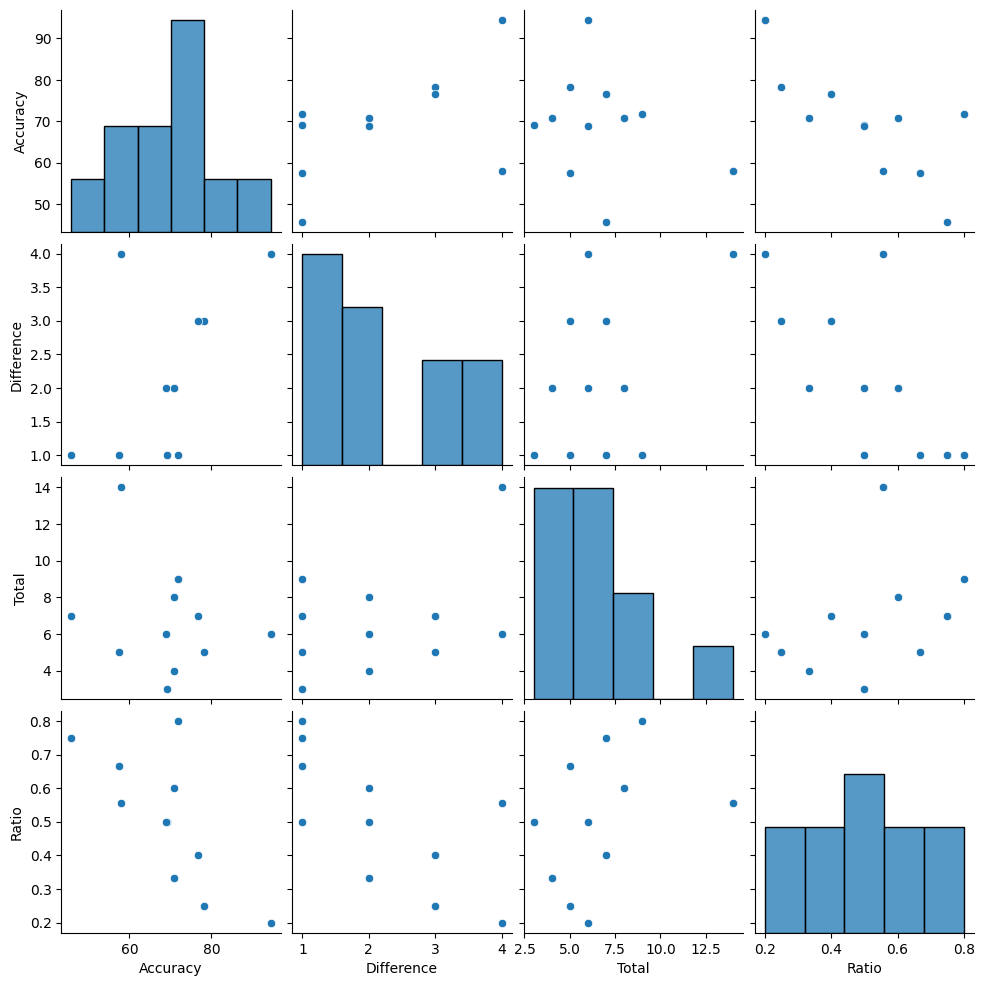

In [ ]:
g = sns.pairplot(corr_values__all, diag_kind="hist")

In [ ]:
corr_values__all['Difference'].value_counts()

1    4
2    3
3    2
4    2
Name: Difference, dtype: int64

## Dataframe

In [ ]:
def binominal_test_df(input_df):
  values = input_df['Correction'].value_counts()
  k = values[1]
  n = values[1]+values[0]
  p = 0.5
  res = binom_test(k, n, p,alternative='greater')
  p_formated = format_p(res)
  prob = k/n * 100
  res_formated = format_res(prob)
  #return [res,prob]
  return res_formated+' '+p_formated

def filter_by_test_df(input_df,testname):
  filtered_df = input_df[input_df["Test Name"].str.contains(testname)]
  return filtered_df

def get_results(input_df,testname,array):
 # print(testname)
  df = filter_by_test_df(input_df,testname)
  if df.shape[0] != 0:
    result = binominal_test_df(df)
    #p = sn.format(result[0],2)
    #percentage = np.round(result[1])
    #if p != 'None':
    #  array.append(str(percentage)+' '+p)
    #else:
    #  array.append(['none'])
    array.append(result)
  else:
    array.append('Insufficient Data')

def get_parcial_results(input_df,first_test,second_test,array):
  df = input_df[input_df["Test Name"].str.contains(first_test)| input_df["Test Name"].str.contains(second_test)]
  if df.shape[0] != 0:
    result = binominal_test_df(df)
    # p = sn.format(result[0],2)
    # percentage = np.round(result[1])
    #if p != 'None':
    #  array.append(str(percentage)+' '+p)
    #else:
    #  array.append(['none'])
    array.append(result)
  else:
    array.append('Insufficient Data')

def get_average_total(input_df):
    result = binominal_test_df(input_df)
    #p = sn.format(result[0],2)
    #percentage = np.round(result[1])
    #if p != 'None':
    #  array = [str(percentage)+' '+p]
    array = [result]
    total = pd.DataFrame(columns=['Total'], data= [array])
    return total

def generate_dataframe(input_df):
    tests =  ['dice','heap','discrete','disc','rect','continuous']
    array = [input_df.Date[0][2:18]]
    total = get_average_total(input_df)
    for test in tests:
      if test == 'discrete':
        get_parcial_results(input_df,'dice','heap',array)
        continue
      if test == 'continuous':
        get_parcial_results(input_df,'disc','rect',array)
        continue
      else:
        get_results(input_df,test,array)
    new_df = pd.DataFrame(columns=['Session', 'Dice','Heap','Discrete','Disc','Rect','Continuous'], data=[array])
    new_df['Total'] = total
    return new_df

def format_p(number):
  scientific_notation ='{:.0e}'.format(number)
  base = scientific_notation[:1]
  exp = scientific_notation[-3:]
  return '('+str(base)+'e^{'+str(exp)+'})$'
def format_res(number):
  return '$'+str(int(number))

In [ ]:

total_results = generate_dataframe(df_all)
total_results

,Session,Dice,Heap,Discrete,Disc,Rect,Continuous,Total
0,0 [2022-05-21 10:27(16.530)] 0 [2022-0...,$74 (3e^{-12})$,Insufficient Data,$74 (3e^{-12})$,$73 (2e^{-11})$,$73 (1e^{-02})$,$73 (1e^{-12})$,$74 (2e^{-23})$
